# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.stats.weightstats as sw

### Importe o dataset

In [7]:
dados = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [8]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [21]:
descritive_stats = dados.describe()
descritive_stats

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


In [26]:
std_Y = descritive_stats.loc['std', 'Y']
mean_Y = descritive_stats.loc['mean', 'Y']

In [27]:
ss.norm.interval(0.95, loc=mean_Y, scale=std_Y)

(np.float64(16779.20586192445), np.float64(34023.52838465089))

Text(0, 0.5, 'Frequência')

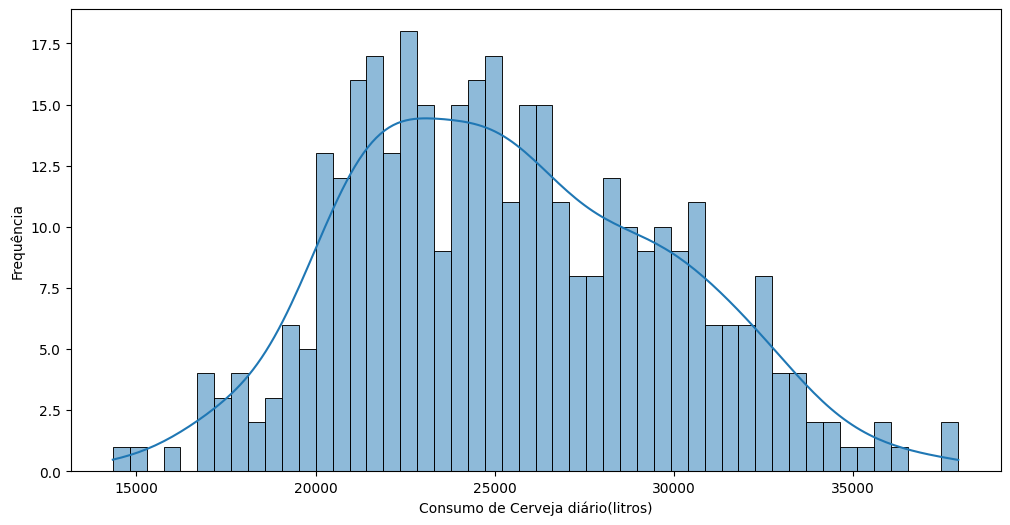

In [18]:
ax = sns.histplot( data = dados.Y, bins = 50, stat = 'count', kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Consumo de Cerveja diário(litros)')
ax.set_ylabel('Frequência')

### Análise gráfica
### Construa um box plot para cada variável do dataset

<Figure size 640x480 with 0 Axes>

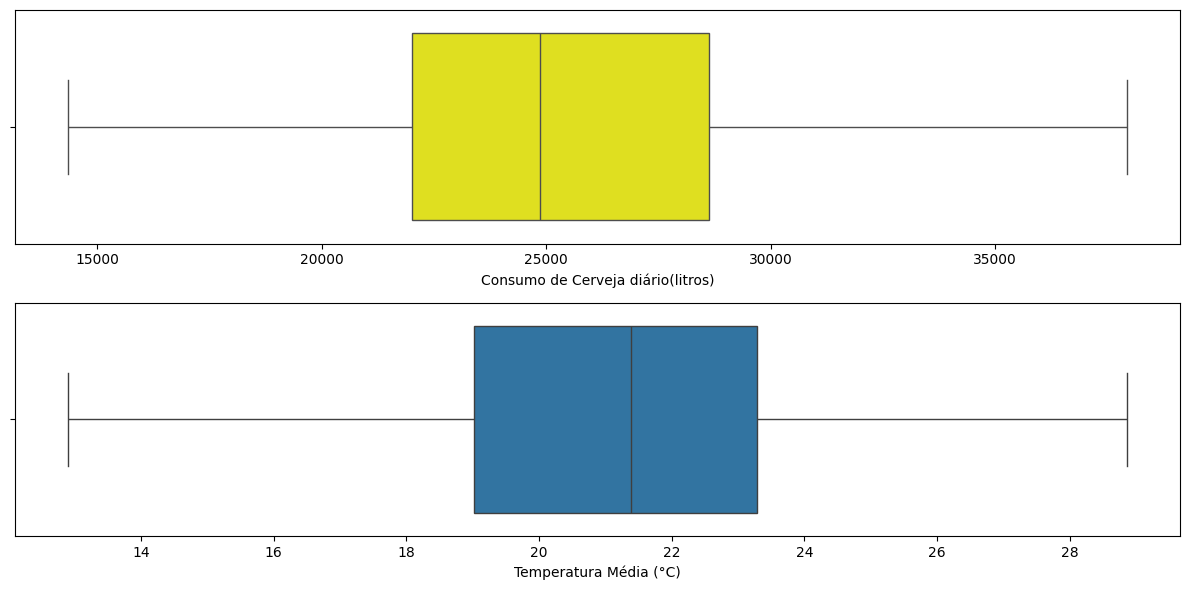

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

ax1 = sns.boxplot(x=dados.Y, ax=ax1, orient = 'h', color = 'yellow')
ax1.set_xlabel('Consumo de Cerveja diário(litros)')

ax2 = sns.boxplot(x=dados.X, ax=ax2)
ax2.set_xlabel('Temperatura Média (°C)')

plt.tight_layout()
plt.show()

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

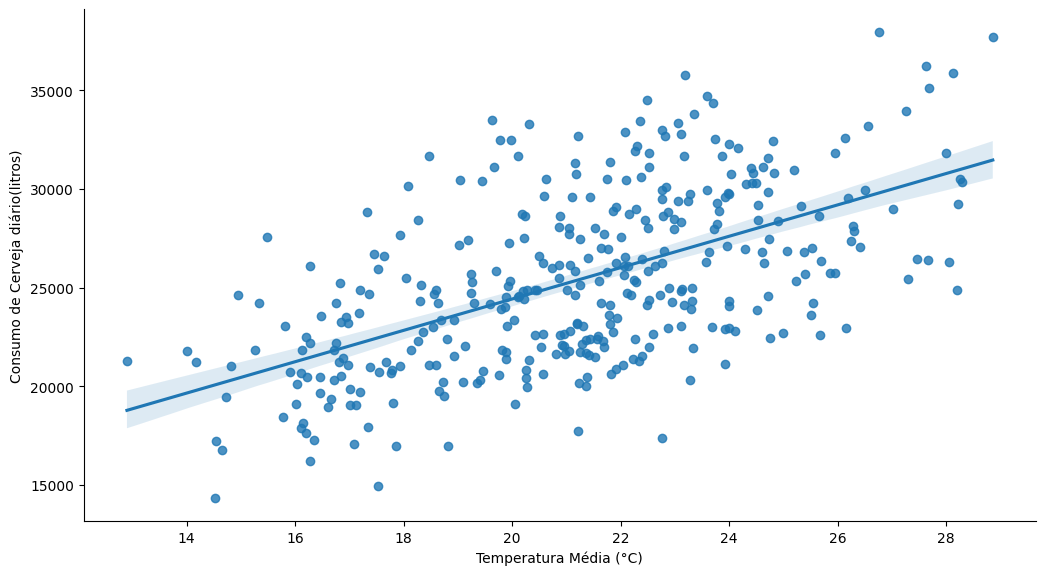

In [38]:
ax = sns.lmplot(data=dados, x='X', y='Y')
ax.figure.set_size_inches(12, 6)

ax.set_xlabels('Temperatura Média (°C)')
ax.set_ylabels('Consumo de Cerveja diário(litros)')
plt.show()



### <font color='red'>Utilizando a matriz de correlação</font>

In [42]:
covariancia = dados[['Y', 'X']].cov()
covariancia

,Y,X
Y,1.935246e+07,8038.714473
X,8.038714e+03,10.113085


In [43]:
correlacao = dados[['Y', 'X']].corr()
correlacao

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [45]:
Y = dados['Y']
X = sm.add_constant(dados['X'])

### Estime o modelo de regressão linear simples

In [46]:
resultado_regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [47]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.87e-33
Time:                        17:42:02   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [48]:
dados['Y_Previsto'] = resultado_regressao.predict()

In [49]:
dados

,Y,X,Y_Previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315
...,...,...,...
360,32307,24.00,27606.088172
361,26095,22.64,26525.047922
362,22309,21.68,25761.960686
363,20467,21.38,25523.495925


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [51]:
consumo_42 = resultado_regressao.predict([1, 42])
consumo_42

array([41913.97383817])

### Obtenha os resíduos da regressão

In [52]:
dados['Residuos'] = resultado_regressao.resid
dados

,Y,X,Y_Previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
...,...,...,...,...
360,32307,24.00,27606.088172,4700.911828
361,26095,22.64,26525.047922,-430.047922
362,22309,21.68,25761.960686,-3452.960686
363,20467,21.38,25523.495925,-5056.495925


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

Text(0, 0.5, 'Resíduos')

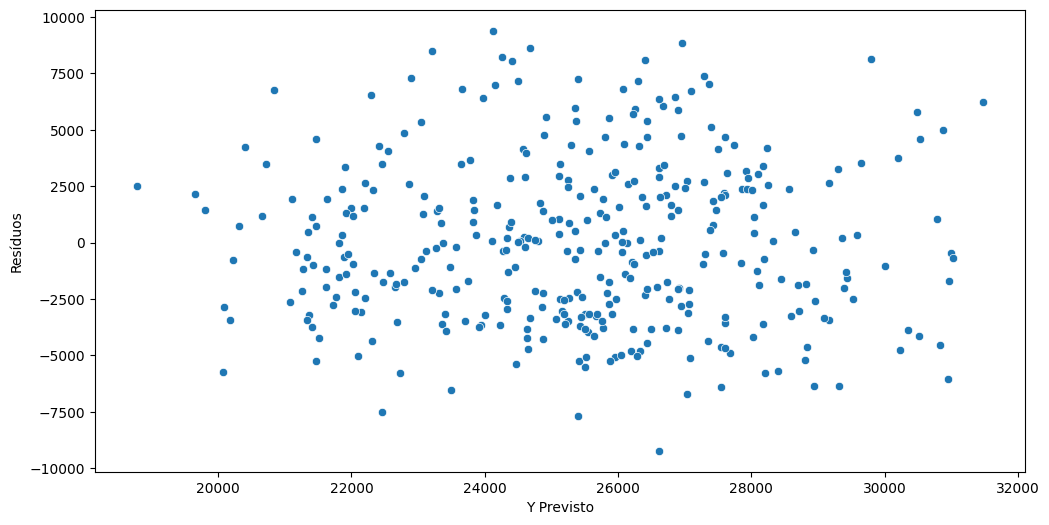

In [53]:
ax = sns.scatterplot(data=dados, x='Y_Previsto', y='Residuos')
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Y Previsto')
ax.set_ylabel('Resíduos')

### Obtenha o QQPlot dos resíduos

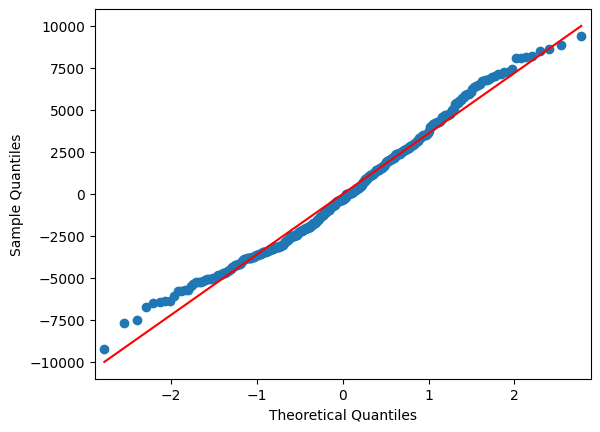

In [54]:
sm.qqplot(dados['Residuos'], line='s')
plt.show()

In [55]:
ss.normaltest(dados.Residuos)1)

NormaltestResult(statistic=np.float64(11.299692518717478), pvalue=np.float64(0.003518057601769221))

In [56]:
ss.shapiro(dados.Residuos)

ShapiroResult(statistic=np.float64(0.9843480693998644), pvalue=np.float64(0.000543706218876475))

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

# Os resíduos possuem homocestaticidade, o que indica uma relação linear.<br>

* A linearidade e a homocedasticidade garantem boas previsões. A normalidade dos resíduos não é uma exigência forte para previsões pontuais.
* Os resíduos não se distribuem exatamente como uma distribuição normal. <br>


# A falta de normalidade dos resíduos pode invalidar: <br>

*   P-valores dos coeficientes.
*   Intervalos de confiança.
*   Testes F e T podem ficar não confiáveis.

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [65]:
SQR = ((dados['Y_Previsto'] - dados['Y'].mean())**2).sum()
SQR

np.float64(2325899486.7377872)

In [58]:
SQT = ((dados['Y'] - dados['Y'].mean())**2).sum()
SQT

np.float64(7044294174.805479)

In [66]:
R2 = SQR / SQT
R2

np.float64(0.33018204933243217)

In [61]:
resultado_regressao.rsquared

np.float64(0.330182049332432)

# 📈 Análise Estatística do Modelo de Regressão

---

## 🎯 Capacidade de Previsibilidade

| Métrica | Valor | Análise |
|:---|:---|:---|
| **R²** | 0.330 | O modelo explica 33% da variabilidade da variável dependente \( Y \) através de \( X \). Isso é **baixo** para alguns contextos preditivos, mas pode ser aceitável em áreas onde a variabilidade alta é comum (por exemplo, economia, ciências sociais). |
| **R² ajustado** | 0.328 | Bem próximo do \( R^2 \), indicando que o modelo não sofre de overfitting (o ajuste não é artificial). |

---

## 📊 Análise dos Coeficientes

- **Constante (\( \beta_0 \))**:
  - Estimativa: **8528.91**
  - Erro padrão (std err): **1275.36**
  - Valor t: **6.687** → **Muito alto**.
  - p-valor: **0.000** → **Altamente significativo**.

- **Coeficiente da variável \( X \)**:
  - Estimativa: **794.88**
  - Erro padrão (std err): **59.42**
  - Valor t: **13.377** → **Extremamente alto**.
  - p-valor: **0.000** → **Altamente significativo**.

✅ Ambos os coeficientes são **estatisticamente significativos** ao nível de 5% (e a níveis ainda menores, como 1%).

---

## 🔎 Análise dos Resíduos

| Métrica | Valor | Análise |
|:---|:---|:---|
| **Durbin-Watson** | 1.623 | Valor próximo de 2 (ideal), mas um pouco abaixo. Pode haver **leve autocorrelação positiva** nos resíduos. |
| **Omnibus** | 11.3 | p-valor = 0.004 → **Rejeitamos** normalidade dos resíduos. |
| **Jarque-Bera** | 9.673 | p-valor ≈ 0.008 → Confirma rejeição da normalidade. |
| **Skewness** | 0.324 | Pequena assimetria à direita, mas **não grave**. |
| **Kurtosis** | 2.534 | Menor que 3 → Cauda um pouco mais leve que a normal (platocúrtica). |

✅ Resumo: Pequena violação da normalidade dos resíduos, mas, **com n = 365**, pelo **Teorema Central do Limite**, isso não invalida fortemente o modelo.

---

## 📏 Medidas de Dispersão e Tendência Central

- **Erro padrão dos coeficientes**: relativamente baixo (boa precisão nas estimativas).
- **Intervalos de Confiança 95%**:
  - Para \( \beta_0 \): (6020.88 ; 11000)
  - Para \( \beta_1 \): (678.03 ; 911.74)

✅ Intervalos **estreitos**, indicando **boa precisão** dos coeficientes.

---

## ✅ Pontos Fortes do Modelo

- Coeficientes altamente significativos.
- Intervalos de confiança relativamente estreitos.
- Linearidade entre \( X \) e \( Y \).
- Ampla quantidade de dados (n=365).

---

## ⚠️ Pontos Fracos / Limitações

- Baixo \( R^2 \) (33% de explicação): há outros fatores não capturados pelo modelo.
- Pequena autocorrelação dos resíduos (Durbin-Watson < 2).
- Resíduos não seguem distribuição normal perfeita.

---

## 🚀 Possibilidades de Melhorias

- **Adicionar novas variáveis explicativas** para melhorar o poder preditivo.
- **Transformações na variável dependente** (ex.: aplicar log(Y)) para melhorar a normalidade dos resíduos.
- **Testar modelos não-lineares** para capturar possíveis curvaturas na relação entre \( X \) e \( Y \).
- **Analisar e tratar outliers**.
- **Modelar a autocorrelação dos resíduos** se necessário.

---

# 📌 Conclusão Geral

> O modelo é **estatisticamente significante** e **útil para previsões iniciais**, mas sua **capacidade explicativa é limitada**.  
> Para melhorar a performance e interpretação, seria ideal incluir outras variáveis e verificar melhor a estrutura dos resíduos.

---
